# Visualizations of P-Nodes
Includes bar charts and matrix visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.sparse import csr_matrix 
from mpl_toolkits.mplot3d import Axes3D

import os

from pq_helper import get_dataframe

Helper functions for plotting:

In [2]:
def bar_chart(x_axis, y_axis, x_label, y_label, title, rotation=0):
    index = np.arange(len(x_axis))
    plt.bar(index, y_axis)
    plt.xlabel('%s' % x_label, fontsize=10)
    plt.ylabel('%s' % y_label, fontsize=10)
    plt.xticks(index, x_axis, fontsize=10, rotation=rotation)    
    plt.title('%s' % title)
    plt.show() 
    
def stacked_bar_chart(sheet, x_label, y_label, title, rotation=0, normal=False, sort=False):
    df = pd.crosstab(sheet[x_label], sheet[y_label], normalize=normal)
    if sort: 
        df = df.loc[sheet[x_label].value_counts().index]
    df.plot(kind='bar', stacked=True, fontsize=10)
    plt.title('%s' % title, fontsize=15)   
    plt.xticks(rotation=rotation, fontsize=10)        
    if normal == False: 
        plt.ylabel('Number of Students', fontsize=10)
    else:
        plt.ylabel('Fraction of Students', fontsize=10)
    plt.legend(bbox_to_anchor=(1.35, 1), loc = 'upper right', fancybox=True, framealpha=0.5)
    plt.show()  

def matrix(df, row_label, col_label, data_label, row_list, col_list, title):
    x = df.groupby([row_label, col_label]).mean()   
    r = x.index.get_level_values(0)
    c = x.index.get_level_values(1)
    row = []
    for j in range(len(c)):
        row.append(row_list.index(r[j]))
    row = np.array(row)
    col = []
    for i in range(len(c)):
        col.append(col_list.index(c[i]))
    col = np.array(col)
    data = [] 
    for i in range(len(c)):
        data.append(x[data_label][i])
    data = np.array(data)
    
    avg_views = csr_matrix((data, (row, col)), 
                           shape=(len(row_list), len(col_list))).toarray()
    plt.imshow(avg_views, cmap='Blues')
    plt.title(title)
    plt.xticks(np.arange(len(col_list)), col_list, rotation=90)    
    plt.yticks(np.arange(len(row_list)), row_list)
    clb = plt.colorbar()
    plt.xlabel(col_label)
    plt.ylabel(row_label)
    clb.set_label('Average %s' % data_label)   
    plt.show()
    
def scatter3D(x_list, y_list, z_list, colors, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')    
    
    for i in range(len(x_list)):
        ax.scatter(x_list[i], y_list[i], z_list[i], c=colors[i], 
                   label=labels[i]) 
        
    ax.set_xlabel('N-Score')
    ax.set_ylabel('Days Online')
    ax.set_zlabel('Views')
    plt.legend(loc=2)
    
    plt.show()

First, load in the data:

In [3]:
data_path = 'data/'
path = os.path.join(data_path, 'acm95a100a2018_anonymized_modified.xlsx')
(p_nodes, q_nodes, links, mod_p_nodes) = get_dataframe(path)

In [4]:
p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


In [5]:
mod_p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,Option2,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B,0,ME,0.0,0.0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A,1,Other,1.0,5.0,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A,1,Other,4.0,4.0,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A,1,Other,0.0,3.0,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A,1,ME,20.0,9.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,Other,NaN,NaN,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,Other,NaN,NaN,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,Other,NaN,NaN,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,Other,NaN,NaN,N


Note a key difference between `p_nodes` and `mod_p_nodes`:

1. In `mod_p_nodes`, different tracks of the same option are combined together under one option title (i.e. ChE (MS) and ChE (PS) are both considered to be ChE).

2. In `mod_p_nodes`, a second `Option2` column contains either the same value as `Option` if the option is among the top 6 options, or 'Other' if not.

We will mostly use `mod_p_nodes` for our visualizations, though occasionally we will include plots using `p_nodes` for comparison.

Set up lists and dictionaries of options, classes, and grades:

In [6]:
option_dict = {'ACM': 'CMS', 'AM': 'MCE', 'APh': 'APMS', 'Ae':'EAS', 
                'Aph':'APMS', 'BE':'BBE', 'BMB':'CCE', 'Bi':'BBE', 
                'CS':'CMS', 'Ch':'CCE', 'ChE': 'CCE', 'ChE (BM)':'CCE', 
                'ChE (Env)':'CCE', 'ChE (MS)':'CCE', 'ChE (PS)': 'CCE', 
                'EE':'EE', 'Eng': 'Hum', 'Eng (CNS)': 'Hum', 'Ge': 'GPS', 
                'ME':'MCE', 'MS':'APMS', 'MedE': 'MedE', 'Ph': 'PMA', 
                'PlSc':'Hum', 'SE':'EAS', 'AsPh':'PMA'}
options = ['ACM', 'AM', 'APh', 'Ae', 'AsPh', 'BE', 'BMB', 'Bi', 'CS', 'Ch', 
            'ChE', 'ChE (BM)', 'ChE (Env)', 'ChE (MS)', 'ChE (PS)', 'EE', 
            'Eng', 'Eng (CNS)', 'Ge', 'ME', 'MS', 'MedE', 'Ph', 'PlSc', 'SE']
options2 = ['ACM', 'AM', 'APh', 'Ae', 'AsPh', 'BE', 'BMB', 'Bi', 'CS', 'Ch', 
            'ChE', 'EE', 'Eng', 'Ge', 'ME', 'MS', 'MedE', 'Ph', 'PlSc', 'SE']
classes_g_to_u = ['G1', 'G2', 'G5', 'U2', 'U3', 'U4']
classes_u_to_g = ['U2', 'U3', 'U4', 'G1', 'G2', 'G5']
undergrad = ['U2', 'U3', 'U4']      
grade_dict = {'A+': 'A', 'A': 'A', 'A-': 'A', 'B+': 'B', 'B': 'B', 
                'B-': 'B', 'C+': 'C', 'C': 'C', 'C-': 'C', 'D+': 'D'}
grades = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+']

Add column for seniority to $p$-node dataframes:

In [7]:
# Separate by UG vs G (N means neither (Instructor and TAs))
mod_p_nodes['Seniority'] = [item[0] for item in mod_p_nodes['Class'][0:184]] + ['N'] * 12    
p_nodes['Seniority'] = [item[0] for item in p_nodes['Class'][0:184]] + ['N'] * 12
p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


We will explore with various plots of the $p$-node distributions. First, we examine the distribution of the class in terms of Class and Seniority (Undergrad vs Grad).

In [8]:
mod_p_nodes['Class'].value_counts()

U2    84
G1    54
U3    39
U4     4
G2     2
G5     1
Name: Class, dtype: int64

In [9]:
mod_p_nodes['Seniority'].value_counts()

U    127
G     57
N     12
Name: Seniority, dtype: int64

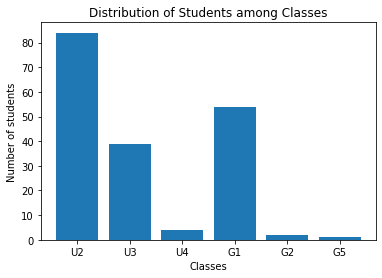

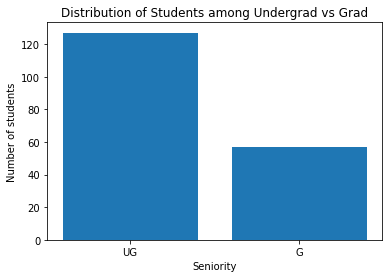

In [10]:
class_numbers = [84, 39, 4, 54, 2, 1]  
bar_chart(classes_u_to_g, class_numbers, 'Classes', 'Number of students', 'Distribution of Students among Classes') 
    
# undergrad vs grad
bar_chart(['UG', 'G'], [127, 57], 'Seniority', 'Number of students', 'Distribution of Students among Undergrad vs Grad')     

Undergraduates make up just over two-thirds of the class. Among undergraduates, sophomores and juniors are most likely to take the course, while first-year graduate students make up the majority of the graduate student enrollment. 

Next, we'll look at the distribution of options within each class.

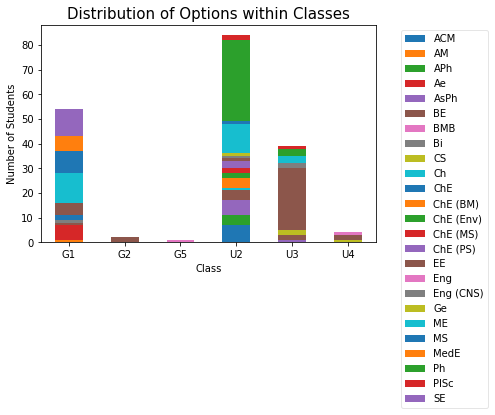

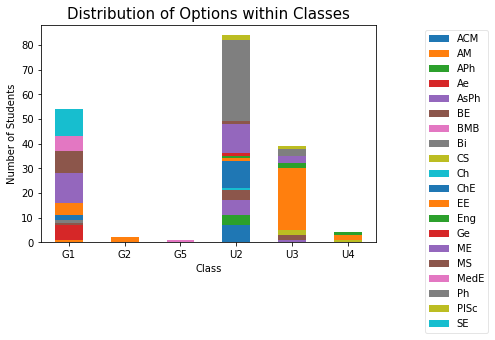

In [11]:
stacked_bar_chart(p_nodes, 'Class', 'Option', 'Distribution of Options within Classes') 
stacked_bar_chart(mod_p_nodes, 'Class', 'Option', 'Distribution of Options within Classes')

Since many options only have a few students, we will look at the top 6 options and group the remaining into 'Other'. For reference, we include below the code used to compute the `Option2` column. 
 ```python
top6 = mod_p_nodes['Option'].value_counts().index[:6]
mod_p_nodes['Option2'] = mod_p_nodes['Option'].apply(lambda x: x if x in top6 else 'Other')
with pd.ExcelWriter(os.path.join(data_path, 'acm95a100a2018_anonymized_modified.xlsx')) as writer:
    p_nodes.to_excel(writer,'P-Nodes', index=False)
    q_nodes.to_excel(writer,'Q-Nodes', index=False)
    links.to_excel(writer,'Links', index=False)
    mod_p_nodes.to_excel(writer,'P-Nodes-Modified', index=False)
    writer.save()
```


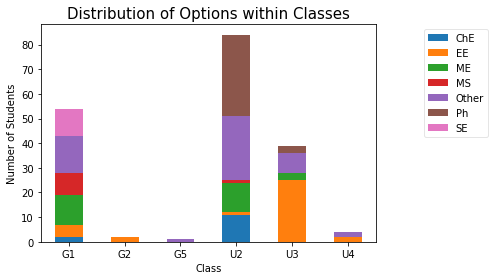

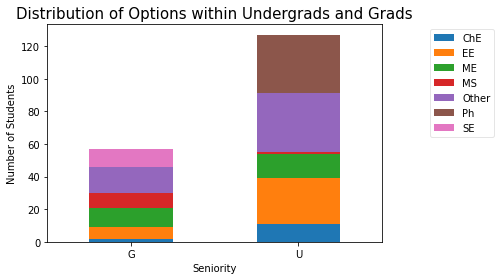

In [12]:
# Taking the top 6 options only and putting the rest as 'Other':
stacked_bar_chart(mod_p_nodes, 'Class', 'Option2', 'Distribution of Options within Classes')  
stacked_bar_chart(mod_p_nodes.loc[mod_p_nodes['Seniority'] != 'N'], 'Seniority', 'Option2', 'Distribution of Options within Undergrads and Grads') 

We see that there is a good mix of options among grad students. Among undergraduates, physics and electrical engineering are common majors. Physics is the most common major among sophomores and electrical engineering is the most common major among juniors. This breakdown likely reflects patterns of when students of each option tend to take their ACM95ab requirement.

We'll now look at the distribution of grades within each class and within undergrads/grads. We find that `+/-` grades do not add much value to the plots, so we combine them into a single letter grade. 

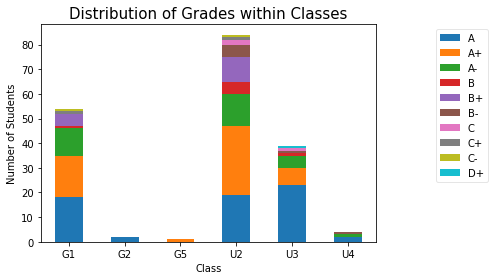

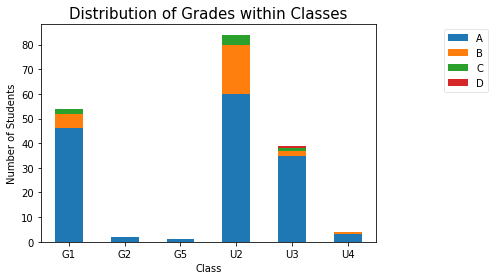

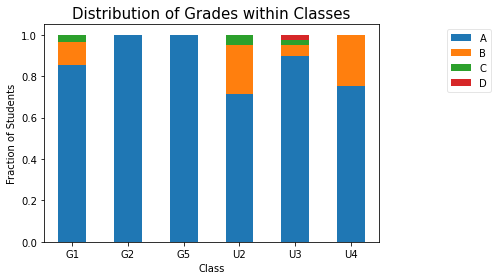

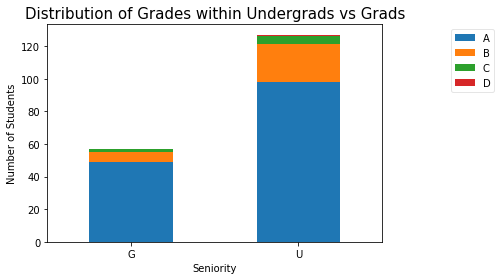

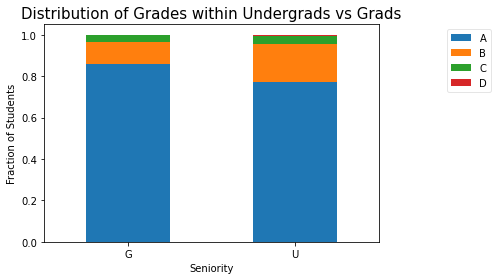

In [14]:
stacked_bar_chart(p_nodes, 'Class', 'Grade', 'Distribution of Grades within Classes')
stacked_bar_chart(mod_p_nodes, 'Class', 'Grade', 'Distribution of Grades within Classes') 
stacked_bar_chart(mod_p_nodes, 'Class', 'Grade', 'Distribution of Grades within Classes', normal='index') 
stacked_bar_chart(mod_p_nodes, 'Seniority', 'Grade', 'Distribution of Grades within Undergrads vs Grads')    
stacked_bar_chart(mod_p_nodes, 'Seniority', 'Grade', 'Distribution of Grades within Undergrads vs Grads', normal='index')     

The breakdown of grades across classes and seniorities appears similar. Most students received an `A` or `B` grade, and the proportion of students who received `A`s or `B`s is similar across classes and between undergrads/grads.

Let's now visualize the breakdown of students by option. As we observed previously, the top three options are physics, electrical engineering, and mechanical engineering. Chemical engineering, space engineering (grad option only), and materials science round out the top 6. These are typical majors that require ACM95ab for graduation.

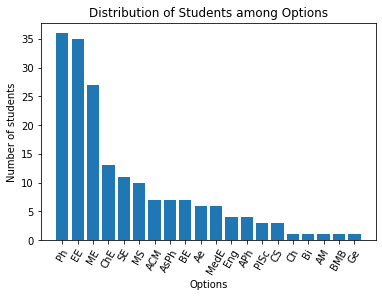

In [15]:
bar_chart(mod_p_nodes['Option'].value_counts().index, mod_p_nodes['Option'].value_counts(), 
          'Options', 'Number of students', 'Distribution of Students among Options', 60) 

Now examine the distribution of classes within each option and within undergrads/grads, sorted by the total number of students in each option.

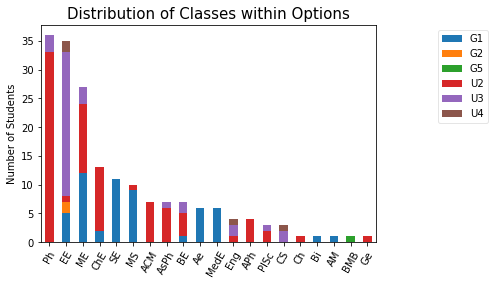

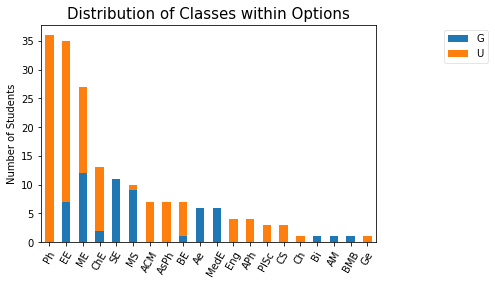

In [16]:
stacked_bar_chart(mod_p_nodes, 'Option', 'Class', 'Distribution of Classes within Options', rotation=60, sort=True) 
stacked_bar_chart(mod_p_nodes, 'Option', 'Seniority', 'Distribution of Classes within Options', rotation=60, sort=True)  

We observe that the all of the physics students are undergrads, with the vast majority being sophomores. Grad students make up the bulk of space engineering, materials science, aerospace engineering, and medical engineering students, which is expected as all of these options except materials science are grad-only.

We'll plot the same to visualize the distribution of grades within options. There is no visible difference in grade breakdown by option, except for the physics option having a higher proportion of students receiving `B`s and `C`s than some other options. However, the physics option is also the largest while many of the options have very few students, so this is not surprising. 

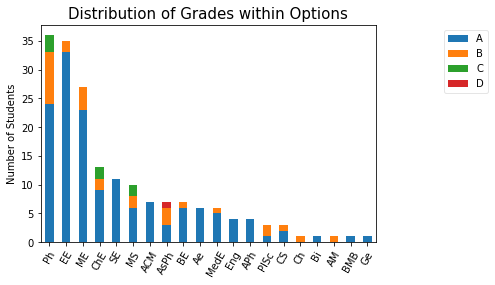

In [17]:
stacked_bar_chart(mod_p_nodes, 'Option', 'Grade', 'Distribution of Grades within Options', rotation=60, sort=True)    

We can also look at the overall distribution of final grades. The vast majority of students scored in the `A` range.

In [18]:
p_nodes['Grade'].value_counts()

A     64
A+    53
A-    30
B+    15
B-     7
B      7
C      3
C-     2
C+     2
D+     1
Name: Grade, dtype: int64

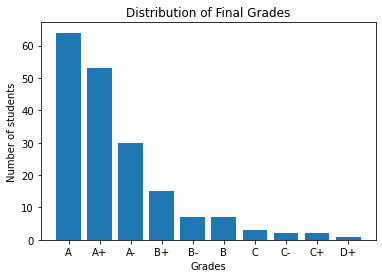

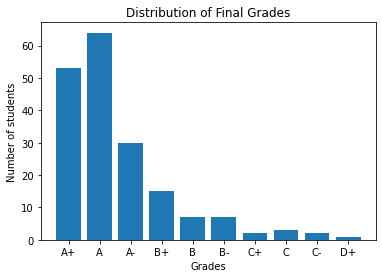

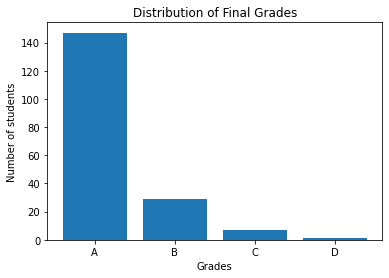

In [19]:
bar_chart(p_nodes['Grade'].value_counts().index, p_nodes['Grade'].value_counts(), 
          'Grades', 'Number of students', 'Distribution of Final Grades') 

# sort by highest to lowest grade
grades_numbers = [53, 64, 30, 15, 7, 7, 2, 3, 2, 1]  
bar_chart(grades, grades_numbers, 'Grades', 'Number of students', 
              'Distribution of Final Grades')  

# don't include +/- grades
bar_chart(mod_p_nodes['Grade'].value_counts().index, mod_p_nodes['Grade'].value_counts(), 
          'Grades', 'Number of students', 'Distribution of Final Grades')

We'll also look at the grade distribution within each class and compare between undergrads and grads.

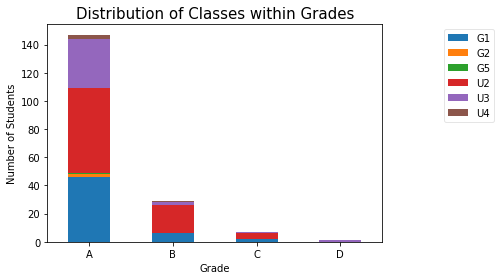

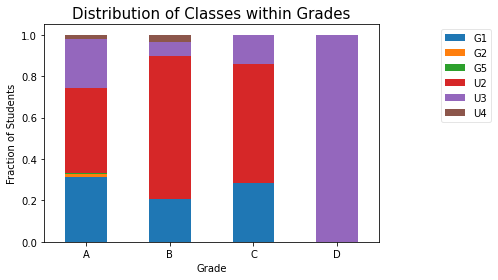

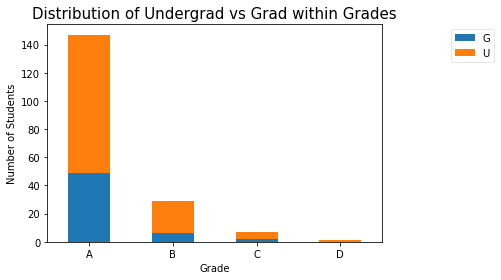

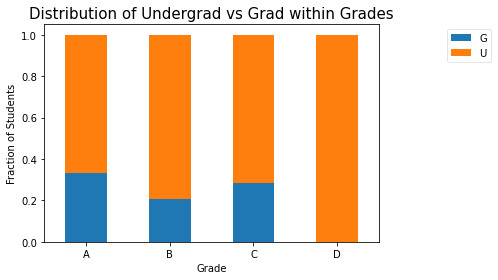

In [20]:
stacked_bar_chart(mod_p_nodes, 'Grade', 'Class', 'Distribution of Classes within Grades') 
stacked_bar_chart(mod_p_nodes, 'Grade', 'Class', 'Distribution of Classes within Grades', normal='index') 
stacked_bar_chart(mod_p_nodes, 'Grade', 'Seniority', 'Distribution of Undergrad vs Grad within Grades') 
stacked_bar_chart(mod_p_nodes, 'Grade', 'Seniority', 'Distribution of Undergrad vs Grad within Grades', normal='index') 

There does not appear to be a noticeable difference in grade breakdown by class or seniority.

Similarly, we will examine the distribution of options within grades. Again, due to the relatively small size of the dataset, there are no noticeable differences.

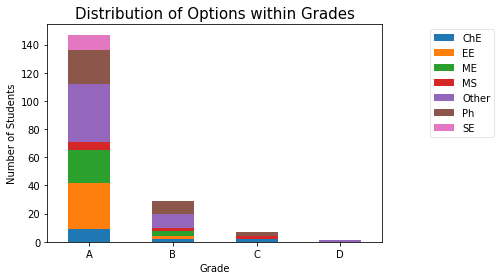

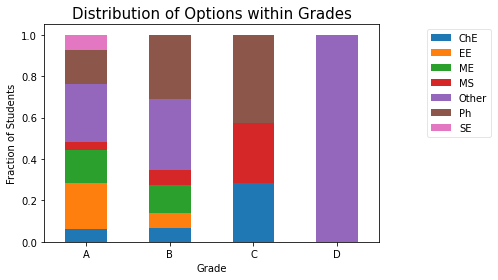

In [21]:
stacked_bar_chart(mod_p_nodes, 'Grade', 'Option2', 'Distribution of Options within Grades', False) 
stacked_bar_chart(mod_p_nodes, 'Grade', 'Option2', 'Distribution of Options within Grades', normal='index')  

We also have various metrics from Piazza, including the `DaysOnline` for each student. We can visualize the average days online for each class/seniority and option in matrix form: 

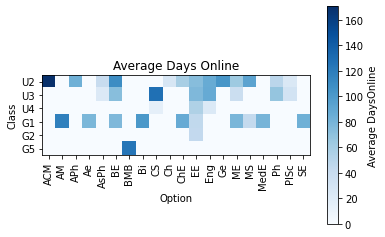

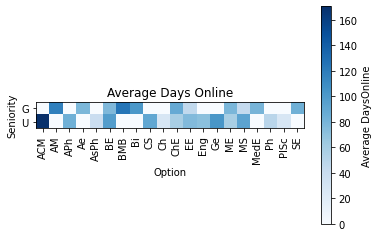

In [22]:
# option vs class   
matrix(mod_p_nodes, 'Class', 'Option', 'DaysOnline', classes_u_to_g, options2, 'Average Days Online') 

# option vs seniority   
matrix(mod_p_nodes, 'Seniority', 'Option', 'DaysOnline', ['G', 'U'], options2, 'Average Days Online') 

It appears that ACM majors were the most active in terms of `DaysOnline`, both for undergraduates and overall. BMB majors were the most active group for graduate students. 

Do the same for `Views`:

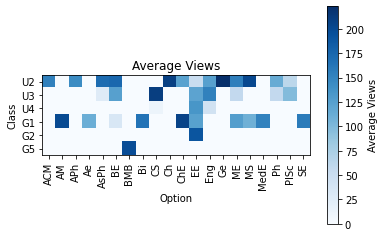

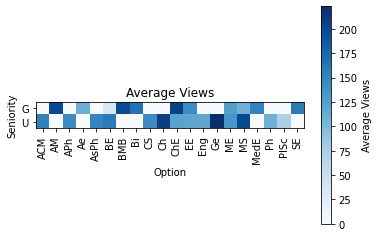

In [23]:
matrix(mod_p_nodes, 'Class', 'Option', 'Views', classes_u_to_g, options2, 'Average Views')
matrix(mod_p_nodes, 'Seniority', 'Option', 'Views', ['G', 'U'], options2, 'Average Views') 

The option with the highest average views was Geology. 

Do the same for `N-Score`:

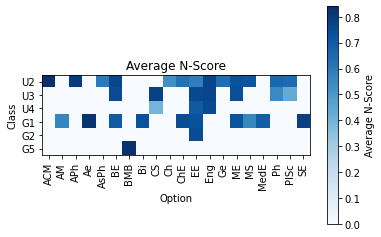

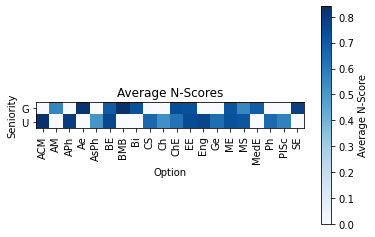

In [36]:
matrix(mod_p_nodes, 'Class', 'Option', 'N-Score', classes_u_to_g, options2, 'Average N-Score')  
matrix(mod_p_nodes, 'Seniority', 'Option', 'N-Score', ['G', 'U'], options2, 'Average N-Scores') 

In terms of `N-Score`, ACM majors have one of the highest averages. This is not surprising, given that this is an ACM course. BMB and Ae students also had high average N-Scores. Options with relatively low N-Scores include chemistry and political science.

Finally, we will create 3D scatter plots of `N-Score` vs `DaysOnline` vs `Views`. We will first color the points by Seniority. 

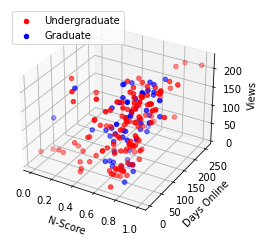

In [25]:
# initialize list of coordinates for undergrads and grads 
x_u = mod_p_nodes.loc[mod_p_nodes['Class'].isin(undergrad)]['N-Score']
y_u = mod_p_nodes.loc[mod_p_nodes['Class'].isin(undergrad)]['DaysOnline']
z_u = mod_p_nodes.loc[mod_p_nodes['Class'].isin(undergrad)]['Views']
x_g = mod_p_nodes.loc[~mod_p_nodes['Class'].isin(undergrad)]['N-Score']
y_g = mod_p_nodes.loc[~mod_p_nodes['Class'].isin(undergrad)]['DaysOnline']
z_g = mod_p_nodes.loc[~mod_p_nodes['Class'].isin(undergrad)]['Views']
    
scatter3D([x_u, x_g], [y_u, y_g], [z_u, z_g], ['r', 'b'], ['Undergraduate', 'Graduate'])

Next, we color the points by Grade: 

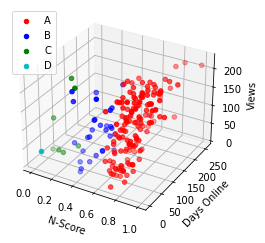

In [41]:
# initialize coordinates
x_a = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'A']['N-Score']
y_a = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'A']['DaysOnline']
z_a = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'A']['Views']
x_b = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'B']['N-Score']
y_b = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'B']['DaysOnline']
z_b = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'B']['Views'] 
x_c = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'C']['N-Score']
y_c = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'C']['DaysOnline']
z_c = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'C']['Views']
x_d = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'D']['N-Score']
y_d = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'D']['DaysOnline']
z_d = mod_p_nodes.loc[mod_p_nodes['Grade'] == 'D']['Views']
    
scatter3D([x_a, x_b, x_c, x_d], [y_a, y_b, y_c, y_d], [z_a, z_b, z_c, z_d], 
         ['r', 'b', 'g', 'c'], ['A', 'B', 'C', 'D'])    

Finally, color by option:

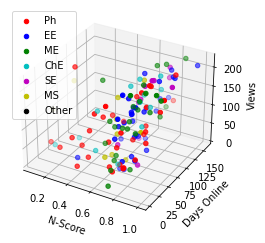

In [27]:
# initialize coordinates 
x_ph = mod_p_nodes.loc[mod_p_nodes['Option'] == 'Ph']['N-Score']
y_ph = mod_p_nodes.loc[mod_p_nodes['Option'] == 'Ph']['DaysOnline']
z_ph = mod_p_nodes.loc[mod_p_nodes['Option'] == 'Ph']['Views']
x_ee = mod_p_nodes.loc[mod_p_nodes['Option'] == 'EE']['N-Score']
y_ee = mod_p_nodes.loc[mod_p_nodes['Option'] == 'EE']['DaysOnline']
z_ee = mod_p_nodes.loc[mod_p_nodes['Option'] == 'EE']['Views']
x_me = mod_p_nodes.loc[mod_p_nodes['Option'] == 'ME']['N-Score']
y_me = mod_p_nodes.loc[mod_p_nodes['Option'] == 'ME']['DaysOnline']
z_me = mod_p_nodes.loc[mod_p_nodes['Option'] == 'ME']['Views']
x_che = mod_p_nodes.loc[mod_p_nodes['Option'] == 'ChE']['N-Score']
y_che = mod_p_nodes.loc[mod_p_nodes['Option'] == 'ChE']['DaysOnline']
z_che = mod_p_nodes.loc[mod_p_nodes['Option'] == 'ChE']['Views']
x_se = mod_p_nodes.loc[mod_p_nodes['Option'] == 'SE']['N-Score']
y_se = mod_p_nodes.loc[mod_p_nodes['Option'] == 'SE']['DaysOnline']
z_se = mod_p_nodes.loc[mod_p_nodes['Option'] == 'SE']['Views']
x_ms = mod_p_nodes.loc[mod_p_nodes['Option'] == 'MS']['N-Score']
y_ms = mod_p_nodes.loc[mod_p_nodes['Option'] == 'MS']['DaysOnline']
z_ms = mod_p_nodes.loc[mod_p_nodes['Option'] == 'MS']['Views']
x_other = mod_p_nodes.loc[mod_p_nodes['Option'] == 'Other']['N-Score']
y_other = mod_p_nodes.loc[mod_p_nodes['Option'] == 'Other']['DaysOnline']
z_other = mod_p_nodes.loc[mod_p_nodes['Option'] == 'Other']['Views']            
    
scatter3D([x_ph, x_ee, x_me, x_che, x_se, x_ms, x_other], 
        [y_ph, y_ee, y_me, y_che, y_se, y_ms, y_other], 
        [z_ph, z_ee, z_me, z_che, z_se, z_ms, z_other], 
        ['r', 'b', 'g', 'c', 'm', 'y', 'k'], 
        ['Ph', 'EE', 'ME', 'ChE', 'SE', 'MS', 'Other'])        

It is unclear whether `DaysOnline` or `Views` contribute to a student's `N-Score`.

### Attributions

Notebook created by Amanda Li. 

Modified from `visualizations_p_nodes_bar.py` by Amanda Li.